In [461]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

## 1. Import Statements

In [462]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
 
%matplotlib inline

## 2. Setup Global Parameters

In [463]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 5000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [464]:
x, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)

x.shape, y.shape

((1000, 2), (1000,))

In [465]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

## Sigmoid Fuction

In [466]:
def fn_sigmoid(z):
    return 1/(1+np.exp(-z))

In [467]:
fn_sigmoid(np.array([-np.inf, 0 ,0.5, 1, np.inf]))

array([0.        , 0.5       , 0.62245933, 0.73105858, 1.        ])

# A function to make predictions
def predict(row, wt):
    z= wt[0]
    for i in range(len(row)-1):
        z= wt[i+1]*row[i]+z
        
    return fn_sigmoid(z)


## Tanh Activation Function

In [468]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(a):
    return 1 - np.tanh(a)**2

In [469]:
fn_actv(np.array([[-1, 0, 1], [-np.inf, 0 , np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [470]:
def fn_softmax(z):
    exp_sc = np.exp(z)
    return (exp_sc/np.sum(exp_sc,axis=1,keepdims=True))

In [471]:
pred = fn_softmax(np.array([[8,5,1],[-10,0,10]]))
pred

array([[9.51747406e-01, 4.73847131e-02, 8.67881295e-04],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

In [472]:
def calculate_loss(model,X,y):
    w1,w2,w3,b1,b2,b3 = model['W1'],model['W2'],model['W3'],model['b1'],model['b2'],model['b3']
    m = X.shape[0]
            #Layer 1
    z1 = X.dot(w1)+b1
    a1 = fn_actv(z1)
            
            #Layer 2
    z2 = a1.dot(w2)+b2
    a2 = fn_actv(z2)

            #Layer 3
    z3 = a2.dot(w3)+b3
    a3 = fn_softmax(z3)

    data_loss = -(y*np.log(a3)+ (1-y)*np.log(1-a3)).sum()

    return  1./m*data_loss

## 5. Prediction

In [473]:
def predict(model,X):
    
    w1,w2,w3,b1,b2,b3 = model['W1'],model['W2'],model['W3'],model['b1'],model['b2'],model['b3']
            
            #Layer 1
    z1 = X.dot(w1)+b1
    a1 = fn_actv(z1)
            
            #Layer 2
    z2 = a1.dot(w2)+b2
    a2 = fn_softmax(z2)

            #Layer 3
    z3 = a2.dot(w3)+b3
    a3 = fn_softmax(z3)

    return np.argmax(a3,axis=1)

In [474]:
y_train.shape

(800,)

In [475]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [476]:
# prepare the Model

def build_model(X ,y , epochs = EPOCHS, alpha= ALPHA):
    
    
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    W2 = np.random.rand(nn_hdim, nn_hdim) / np.sqrt(nn_input_dim)
    W3 = np.random.rand(nn_hdim, nn_output_dim)/np.sqrt(nn_input_dim)  
    
    b1 = np.zeros ((1, nn_hdim))
    b2 = np.zeros ((1, nn_hdim))
    b3 = np.zeros((1, nn_output_dim))
    m = X.shape[0]
    curr_loss = 0
    
    loss = []
    epoch = []
    
    for i in range (epochs):
        
        #### Forward Propagation
        
        # Layer 1
        z1 = X.dot(W1) + b1 # Aggregation
        a1 = fn_actv (z1) # Activation
        
        # Layer 2
        z2 = a1.dot(W2) + b2
        a2 = fn_actv(z2)
        
        # Layer 3
        z3 = a2.dot(W3) + b3    #Aggrigaion Function
        a3 = fn_softmax(z3)    #Activation Function
        
        
        ### Back Propagation

        #Layer 3
        dz3 = a3 - y
        assert(z3.shape == dz3.shape), f'error z3 {z3.shape}/{dz3.shape}'
        
        dW3 = (a1.T).dot(dz3)
        assert(W3.shape == dW3.shape), f'error W3 {W3.shape}/{dW3.shape}'
        
        db3 = np.sum(dz3, axis = 0, keepdims=True)
        assert(b3.shape == db3.shape), f'error b3 {b3.shape}/{db3.shape}'
        
        
        da2 = dz3.dot(W3.T)
        
        # Layer 2
        dz2 = da2*fn_actv_prime(z2)
        
        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), 'Shape of W2 {} and shape of dW2 {}'.format(W2.shape, dW2.shape)
        
        db2 = np.sum(dz2, axis = 0, keepdims=True)
        assert (b2.shape == db2.shape), 'Shape of b2 {} and shape of db2 {}'.format(b2.shape, db2.shape)
        
        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), 'Shape of a1 {} and shape of da1 {}'.format(a1.shape, da1.shape)

        # Layer 1
        dz1 = da1 * fn_actv_prime(z1)
        assert (z1.shape == dz1.shape), 'Shape of z1 {} and shape of dz1 {}'.format(z1.shape, dz1.shape)

        dW1 = (X.T).dot(dz1)
        assert (W1.shape == dW1.shape), 'Shape of W1 {} and shape of dW1 {}'.format(W1.shape, dW1.shape)
        db1 = np.sum(dz1, axis = 0, keepdims=True)
        assert (b1.shape == db1.shape), 'Shape of b1 {} and shape of db1 {}'.format(b1.shape, db1.shape)

        ########################
        ### Gradient Updates ###
        ########################
        # gradients are being updated for every epoch
        W1 += -alpha *dW1 / m
        W2 += -alpha *dW2 / m
        W3 += -alpha *dW3 / m
        b1 += -alpha *db1 / m
        b2 += -alpha *db2 / m
        b3 += -alpha *db3 / m
        
        # Store model in a dict object
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
        
        # for every nth epoch calculate loss for future plotting
        if i%100 ==  0:
            curr_loss = calculate_loss (model, X, y)
            loss.append(curr_loss)
            epoch.append(i)
            print ('loss after {} epochs : {}'.format(i,curr_loss))
    
    # update loss_hist
    hist['epoch'] =epoch
    hist['loss'] = loss
    
    
    return model

In [477]:
def build_model1(X,y, alpha=ALPHA, n_epoch=EPOCHS):
    w1 = np.random.rand(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    w2 = np.random.rand(nn_hdim,nn_hdim)/np.sqrt(nn_input_dim)
    w3 = np.random.rand(nn_hdim,nn_output_dim)/np.sqrt(nn_input_dim)

    b1 = np.zeros((1,nn_hdim)) 
    b2 = np.zeros((1,nn_hdim)) 
    b3 = np.zeros((1,nn_output_dim)) 

    curr_loss=0
    loss ,epoch =[],[]
    m=X.shape[0]
    errors=[]
    for i in range(n_epoch):
        #forward propagation
            
        #Layer 1train
        z1 = X.dot(w1)+b1
        a1 = fn_actv(z1)
                
                #Layer 2
        z2 = a1.dot(w2)+b2
        a2 = fn_actv(z2)
                
                #Layer 3
        z3 = a2.dot(w3)+b3
        a3 = fn_softmax(z3)

        #######################
        #Back propagation       
        #Layer 3
        dz3 = a3-y

        assert(z3.shape == dz3.shape),f'error z3 {z3.shape}/{dz3.shape})'

        dw3 =( a2.T).dot(dz3)
        assert(w3.shape == dw3.shape),f'error w3 {w3.shape}/{dw3.shape}'

        db3 =np.sum(dz3,axis=0,keepdims=True)
        assert(b3.shape == db3.shape),f'error b3 {b3.shape}/{db3.shape}'

        da2 = dz3.dot(w3.T)

        #Layer 2
        
        dz2 = da2*fn_actv_prime(z2)
        
        assert(z2.shape == dz2.shape),f'error z2 {z2.shape}/{dz2.shape})'

        dw2 =( a1.T).dot(dz2)
        assert(w2.shape == dw2.shape),f'error w2 {w2.shape}/{dw2.shape}'

        db2 =np.sum(dz2,axis=0,keepdims=True)
        assert(b2.shape == db2.shape),f'error b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(w2.T)

        #Layer 1
        dz1 = da1*fn_actv_prime(z1)

        dw1 =( X.T).dot(dz1)
        assert(w1.shape == dw1.shape),f'error w1 {w1.shape}/{dw1.shape}'

        db1 =np.sum(dz1,axis=0,keepdims=True)
        assert(b1.shape == db1.shape),f'error b1 {b1.shape}/{db1.shape}'

        w1 += -alpha*dw1/m #gradient update
        w2 += -alpha*dw2/m #gradient update
        w3 += -alpha*dw3/m #gradient update
        b1 += -alpha*db1/m #gradient update
        b2 += -alpha*db2/m #gradient update
        b3 += -alpha*db3/m #gradient update

        model ={'W1':w1, 'W2':w2,'W3':w3,'b1':b1,'b2':b2,'b3':b3 }

        if i%100==0:
            curr_loss = calculate_loss(model,X,y)
            loss.append(curr_loss)
            epoch.append(i)
            print (f'Epoch {i} :  Current loss : {curr_loss  : .5f}')
        
        
        hist['loss']=loss
        hist['epochs']=epoch
    return model

In [478]:
nn_input_dim = X_train.shape[1]
nn_hdim = 4
nn_output_dim = 2

hist = {}

In [479]:
model = build_model (X_train, y_train)

loss after 0 epochs : 1.3919317923936063
loss after 100 epochs : 1.3862954291761822
loss after 200 epochs : 1.3862947519683075
loss after 300 epochs : 1.3862947240388144
loss after 400 epochs : 1.3862946182290805
loss after 500 epochs : 1.386294523695566
loss after 600 epochs : 1.3862944653080154
loss after 700 epochs : 1.3862944302421287
loss after 800 epochs : 1.3862944082266953
loss after 900 epochs : 1.3862943951011
loss after 1000 epochs : 1.3862943961395104
loss after 1100 epochs : 1.3862943938680405
loss after 1200 epochs : 1.3862943898959537
loss after 1300 epochs : 1.3862943859832928
loss after 1400 epochs : 1.3862943735692366
loss after 1500 epochs : 1.386294376692043
loss after 1600 epochs : 1.3862943718696068
loss after 1700 epochs : 1.3862943663427185
loss after 1800 epochs : 1.3862943794971594
loss after 1900 epochs : 1.3862943765764653
loss after 2000 epochs : 1.386294372465768
loss after 2100 epochs : 1.386294369745823
loss after 2200 epochs : 1.3862943676224606
loss af

/home/dai/Documents/Machine Learning/.conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_29526/3887421922.py:2: RuntimeWarning: overflow encountered in exp
  exp_sc = np.exp(z)
/tmp/ipykernel_29526/3887421922.py:3: RuntimeWarning: invalid value encountered in divide
  return (exp_sc/np.sum(exp_sc,axis=1,keepdims=True))


<Axes: xlabel='epoch'>

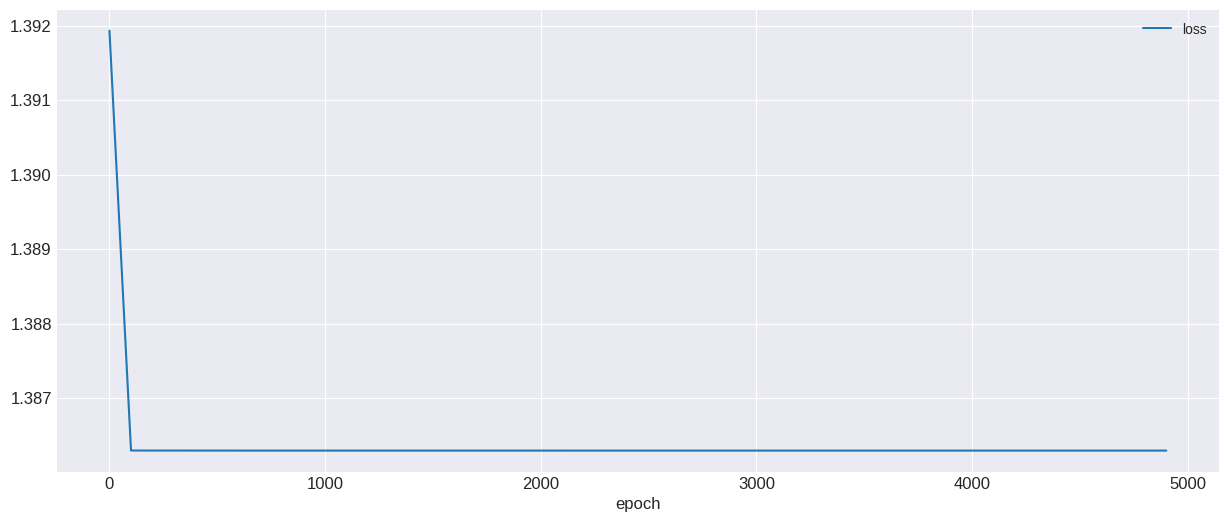

In [480]:
pd.DataFrame(hist).plot(x = 'epoch')

## Question
<div style="font-family: Arial; font-size:1.2em;">
Why do we keep training and not stop at min training error? Hold on! We would get to that eventually.
</div>

## 7. Predictions

### Train Set

In [481]:
y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

Accuracy score on Train Data : 0.5


In [482]:
#print(classification_report(y_train, y_pred))

In [483]:
y_pred = predict(model, X_test)

print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

Accuracy score on Test Data : 0.5


In [484]:
#print(classification_report(y_test, y_pred))

In [485]:
#accuracy_score(X_train[:,-1],y_pred) #calculate accuracy

### Test Set

In [486]:
predictions=[] #LIST

for row in X_test:  #iterate ove all rows
    prediction = predict(model, X_test) #make prediction
        
    predictions.append(y_pred) # collect them in a list

accuracy_score(X_test[:,-1],predictions) #calculate accuracy

cm = confusion_matrix(X_test[:,-1],predictions)
cm

fig.ax =plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap = 'Blues', colorbar=False)

plt.grid()

In [487]:
def fn_plot_decision_boundary(predict,X_tr,y_tr,X_ts,y_ts):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5))
   
    
    # Range of X values (First feature)
    x_min, x_max = X_tr[:, 0].min() - 0.05, X_tr[:, 0].max() + 0.05
    
    # Range of Y values (Second feature)
    y_min, y_max = X_tr[:, 1].min() - 0.05, X_tr[:, 1].max() + 0.05
    
    h=0.01
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    z= predict((np.c_[xx.ravel(),yy.ravel()]))

    z=z.reshape(xx.shape)
    fig = plt.figure()
    ax = fig.add_axes(111)
    ax.contourf(xx,yy,z,cmap=CMAP,)
    ax.scatter(X_tr[:,0],X_tr[:,1],c=np.argmax(y_tr,axis=1),s=30,edgecolor='k',cmap=plt.cm.coolwarm)
    ax.scatter(X_ts[:,0],X_ts[:,1],c=np.argmax(y_ts,axis=1),s=30,marker='*',edgecolor='k',cmap=plt.cm.inferno)

In [488]:
CMAP = 'coolwarm' # plt.cm.Spectral
from collections.abc import Callable

In [489]:
###-----------------------------------
### Function to plot Decision boundary
###-----------------------------------

def fn_plot_decision_boundary(pred_func: Callable[[], np.float64], X_tr: np.ndarray, y_tr: np.ndarray, X_ts :  np.ndarray, y_ts:  np.ndarray,):
    '''
        Attrib:
           pred_func : function based on predict method of the classifier
           X_tr : train feature matrix
           y_tr : train labels
           X_ts : test feature matrix
           y_ts : test labels
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,
                                 s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )

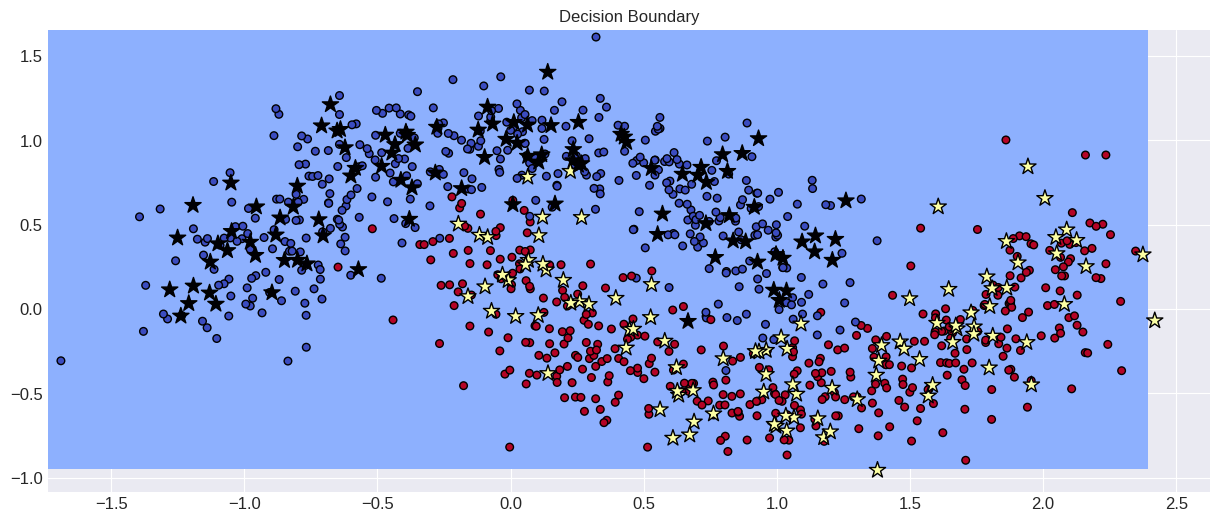

In [490]:
loss_df = pd.DataFrame(hist)

fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train, X_test, y_test) # plot decision boundary for this plot

plt.title("Decision Boundary");

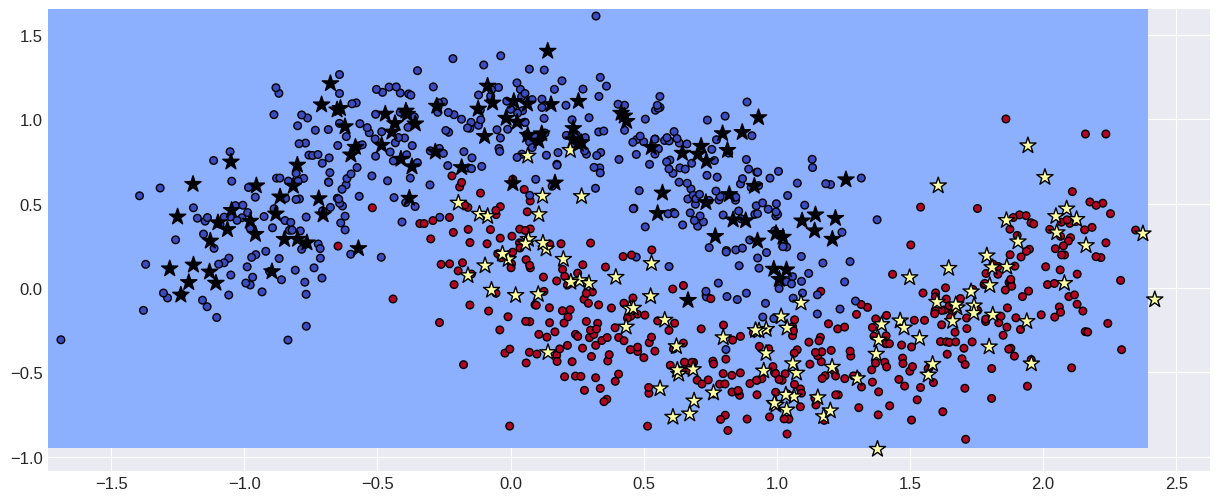

In [491]:
fn_plot_decision_boundary(lambda x:predict(model,x),X_train,y_train,X_test,y_test)

## Tracking
<div style="font-family: Arial; font-size:1.2em;">
Lets track the results across various implementations...

 |#|Implementation|Training Accuracy|Testing Accuracy|Remarks|
 |:-:|---|---|---|---|
 |1|Simple Perceptron|0.83111|0.89000||

## Notes:
<img src="../../images/dnn_nb_s03_fig1.png" width='350' align = 'left'>
<img src="../../images/dnn_nb_s03_fig2.png" width='550' align = 'right'>

## A note on Loss Function
<div style="font-family: Arial; font-size:1.2em;">
    <p>In logistic regression we are looking for if it is correct class or not. </p> 
    <p>For example, we want to know if there is a car in the picture or not. So the output is probability of a car in the picture.</p>
    <p><b>Mathematically speaking:</b></p>
    <p>$\hat{y} = p(y=1|x)$ i.e. given training sample $x$, we want to know probability of $y$ being 1.</p>
    <br>
    <p><b>Alternatively:</b></p>
    <p>If there is a car in the picture.  $\Rightarrow$  $y$ = 1 then $p(y|x)$ = $\hat{y}$.</p>
    <p>If there is <b>no</b> car in the picture.$\Rightarrow$ $y$ = 0 then $p(y|x)$ = 1 - $\hat{y}$.</p>
    <br>
    <p>We can summarize two equations as: $p(y|x)$ = $\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}$</p>
    <p>Above equation is $\hat{y}$ for y = 1 and (1 - $\hat{y}$) for y = 0.</p>
    <p>Taking log of above equation:</p>

$
\begin{aligned}
log [ p(y|x) ] & = log[\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}]\\
& = y * log(\hat{y}) + (1-y) * log(1 - \hat{y})\\
\end{aligned}
$
<p>Since we aim to minimize above function, add negative sign and our loss function becomes</p>

$
\begin{aligned}
L(\hat{y},y) =  -[y * log\hat{y} + (1-y) * log(1-\hat{y})]\\
\text{or}\\
L(a,y) =  - [ y * log ( a ) + ( 1 - y ) * log( 1 - a ) ]\\
\end{aligned}
$

|Case| y |Loss| a |-log(a)|-log(1-a)|
|:-: |:-:|:-: |:-:|  :-: |   :-:  |
| 1  | 0 | -log( 1 - a )| 0.000001 |13.8155|**1 e-6**|
| 2  | 0 | -log( 1 - a )| 0.999999 |1 e-6|**13.8155**|
| 3  | 1 | -log( a )| 0.000001 |**13.8155**|1 e-6|
| 4  | 1 | -log( a )| 0.999999 |**1 e-6**|13.8155|

</div>

<div style="font-family: Arial; font-size:1.2em;">
    <p>For binary classification the error = - $y * log(a)$</p>
    <p>We want to sum it up for all samples in the dataset. Hence:</p>

$
\begin{aligned}
p(\text{all ys | all rows of x}) & =  \Pi_{i=0}^m p(y|x)\\
log [ p(\text{all ys | all rows of x})] & =  log [ \Pi_{i=0}^m p(y|x) ]\\
& =  \sum_{i=0}^m log [ p(y|x) ] \\
& =  \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\text{Divide it by m to better scale the costs}\\
& = \frac{1}{m} * \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\end{aligned}
$

### Introducing $\mathrm{sigmoid}$ function for our binary output.
$$
\begin{aligned}
z & = x_1 . w_1 + x_2 . w_2 + b_1 \\
a & = \hat{y} = \sigma(z)\\
dz & = (a - y) \\
db & = dz\\
b & = b - \alpha . db\\
dw_1 & = x_1. dz\\
dw_2 & = x_2.dz\\
w_1 & = w_1 - \alpha . dw_1\\
w_2 & = w_1 - \alpha . dw_2\\
\end{aligned}
$$
### Sigmoid function
$$
\begin{align}
a &= \sigma(z)\\
&= \dfrac{1}{1 + e^{-z}}\\
\end{align}
$$
    <h3>Derivative of sigmoid function</h3>
$$
\begin{align}
\partial{a} &= \partial{(\sigma(z))}\\
&= \dfrac{\partial}{\partial{z}} \left[ \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{\partial}{\partial{z}} \left( 1 + \mathrm{e}^{-z} \right)^{-1} \\
&= -(1 + e^{-z})^{-2}(-e^{-z}) \\
&= \dfrac{e^{-z}}{\left(1 + e^{-z}\right)^2} \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{e^{-z}}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{(1 + e^{-z}) - 1}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ \dfrac{1 + e^{-z}}{1 + e^{-z}} - \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ 1 - \dfrac{1}{1 + e^{-z}} \right] \\
&= \sigma(z) \circ (1 - \sigma(z))\\
&= a \circ (1 - a)
\end{align}
$$
    </div>